# 股市資料集分析

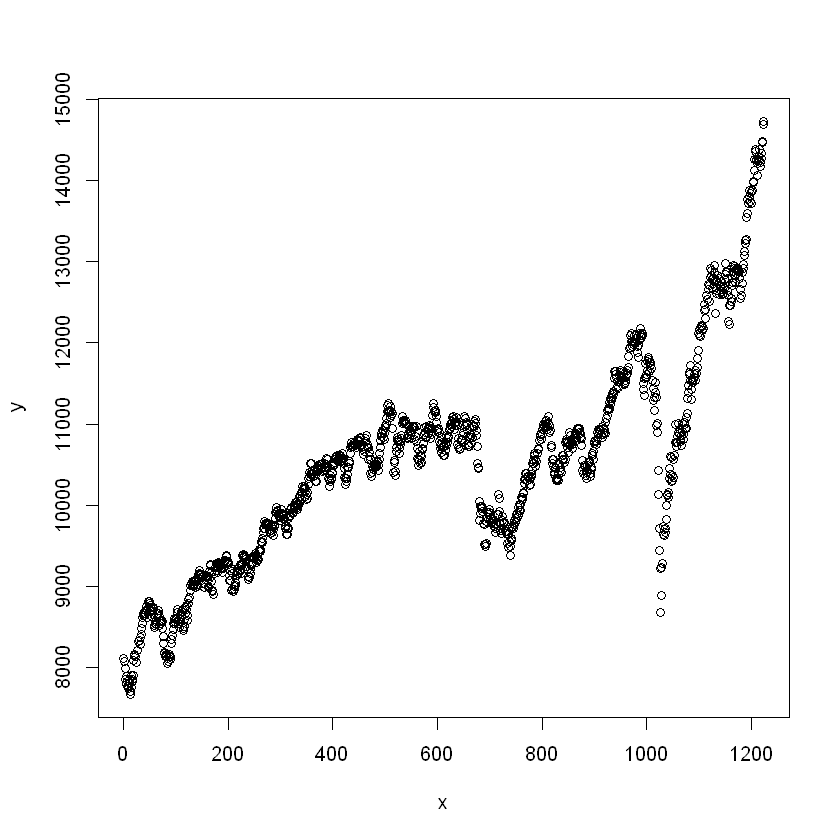

In [1]:
# 讀入Taiwan stock exchange market (台灣股市資料)
stock<- read.table("../data_files/2016_2020stock.csv", header=T, sep=",")

# 畫出原圖
x = 1:nrow(stock)
y = stock$Index 
plot(x,y)

### SMA- simple moving average (移動平均法)

y        y        y 
148.8811 202.2300 280.4072

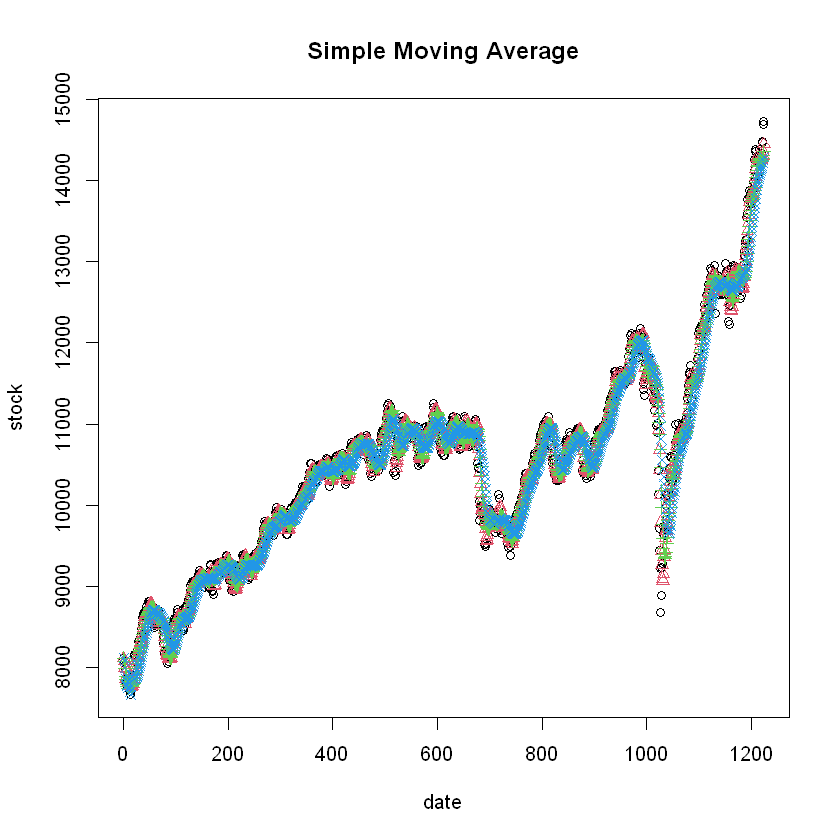

In [2]:
n = c(5,10,20) # length (n=5, n=10, n=20 moving average)
y1 = cbind(y,y,y) # 初始化資料

for (nd in 1:length(n)) #nd: index for length of moving average
    {
     for (i in (n[nd]+1) : length(y))
        {
         j = i-n[nd];
         k = i-1;
         y1[i, nd] = mean(y[j : k])
        }
    }

sqrt(colMeans( (y1-cbind(y,y,y))^2) ) #root mean squared error
plot(x, y, col=1, ylab="stock", xlab="date", main="Simple Moving Average")
points(x, y1[,1], col=2, pch=2)
points(x, y1[,2], col=3, pch=3)
points(x, y1[,3], col=4, pch=4)

### EWMA- exponentially weighted moving average (指數平滑法)

y        y        y 
239.4852 170.9994 141.2242

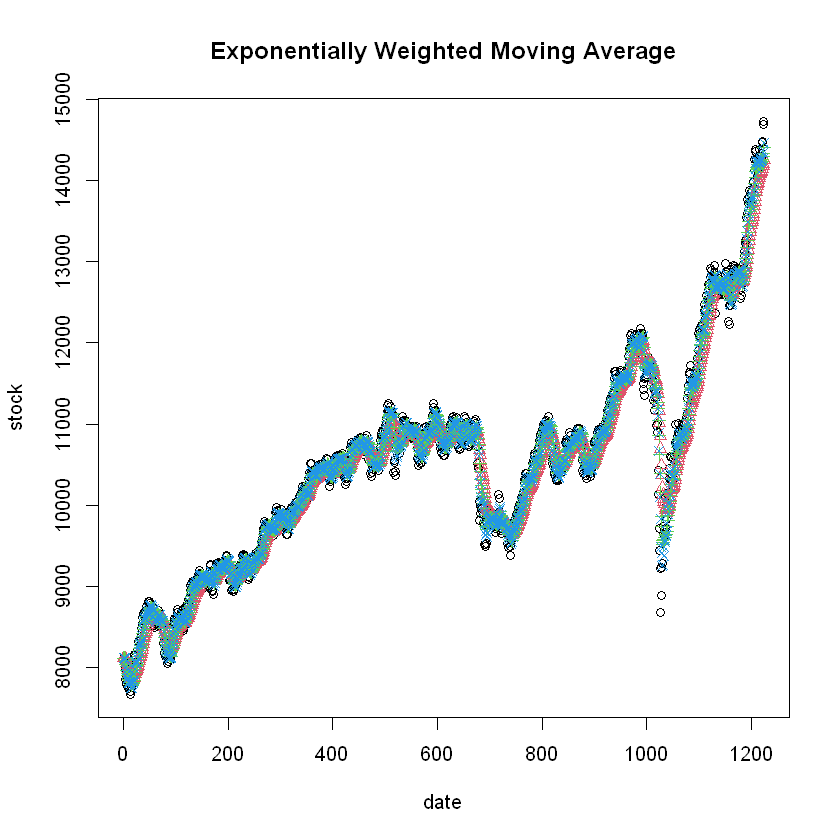

In [3]:
alpha=c(0.1, 0.2, 0.3) #smoothing constant
y2=cbind(y,y,y) #初始化EWMA

for (ld in 1 : length(alpha) )
{ 
  lambda=alpha[ld]
  for (i in 2 : length(y))
  {
    y2[i, ld]= lambda*y[i-1] + (1-lambda)*y2[i-1, ld]
  }
}
sqrt( colMeans((y2-cbind(y,y,y))^2) ) #root mean squared error
plot(x, y, col=1, ylab="stock", xlab="date", main="Exponentially Weighted Moving Average")
points(x, y2[,1], col=2, pch=2)
points(x, y2[,2], col=3, pch=3)
points(x, y2[,3], col=4, pch=4)

Package 'qcc' version 2.7

Type 'citation("qcc")' for citing this R package in publications.



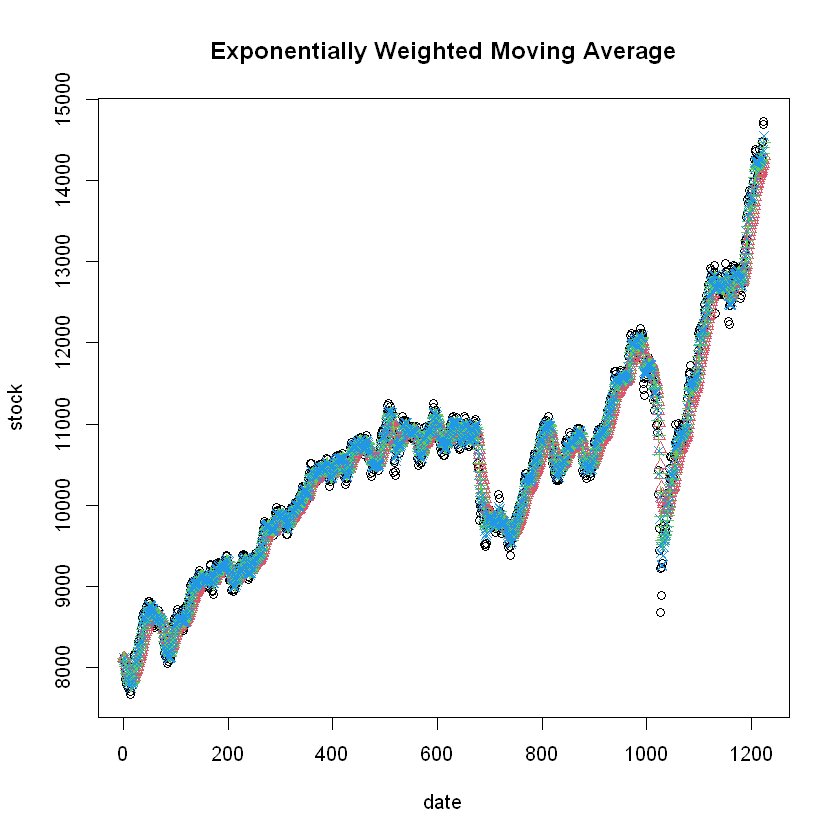

In [4]:
library(qcc) # for ewmaSmooth()

plot(x, y, col=1, ylab="stock", xlab="date", main="Exponentially Weighted Moving Average")
points(ewmaSmooth(x, y, lambda=0.1), col=2, pch=2)
points(ewmaSmooth(x, y, lambda=0.2), col=3, pch=3)
points(ewmaSmooth(x, y, lambda=0.3), col=4, pch=4)

# 性別資料分析

In [5]:
gender_outlier <-read.csv("../data_files/gender_outlier.csv")
attach(gender_outlier)
Male = subset(gender_outlier, Gender=="male")
Female = subset(gender_outlier, Gender=="female")

### 馬氏距離分析離群值(Outlier test based on Mahalanobis distance)

In [6]:
# 取得男性資料的離群值
Ma.mean <-colMeans(Male[, -4])
Ma.var <- cov(Male[c(1:3)], use="pairwise")

cat("Male's mean:\n")
print(Ma.mean)
cat("\nMale's variance:\n")
print(Ma.mean)

# 計算馬氏距離
Male$mdis <- mahalanobis(Male[, -4], Ma.mean, Ma.var)

# 得到離群值index
Male$maout <- (Male$mdis> qchisq(df=3, p=0.95))
Ma.out = which(Male$maout==TRUE)

cat("\nMale's outlier:", Ma.out)

Male's mean:
   Height    Weight     Waist 
174.62222  69.78889  31.90000 

Male's variance:
   Height    Weight     Waist 
174.62222  69.78889  31.90000 

Male's outlier: 1 86 88 89 90

In [7]:
# 同樣方法可得女性資料的離群值
Fe.mean <-colMeans(Female[, -4])
Fe.var<-cov(Female[c(1:3)], use="pairwise")

Female$mdis <- mahalanobis(Female[, -4], Fe.mean, Fe.var)
Female$feout <- (Female$mdis> qchisq(df=3, p=0.95))
Fe.out = which(Female$feout==TRUE)


cat("Female's mean:\n")
print(Fe.mean)
cat("\nFemle's variance:\n")
print(Fe.mean)
cat("\nFemale's outlier:", Fe.out)

Female's mean:
   Height    Weight     Waist 
160.37500  49.70536  25.85714 

Femle's variance:
   Height    Weight     Waist 
160.37500  49.70536  25.85714 

Female's outlier: 24 49 55 56

### 線性迴歸模型的離群值測試(Outlier test for linear regression)

In [8]:
# 線性回歸模型 lm()
MR <- lm(Waist~Weight+Height, gender_outlier[, -4])
summary(MR)


Call:
lm(formula = Waist ~ Weight + Height, data = gender_outlier[, 
    -4])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9356 -1.2165 -0.0594  0.9272  8.5545 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.414121   3.349875   4.004 9.95e-05 ***
Weight       0.236870   0.015309  15.472  < 2e-16 ***
Height       0.008642   0.023377   0.370    0.712    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.931 on 143 degrees of freedom
Multiple R-squared:  0.7779,	Adjusted R-squared:  0.7748 
F-statistic: 250.4 on 2 and 143 DF,  p-value: < 2.2e-16


In [9]:
library(carData) # for outlierTest
library(car)     # for outlierTest

outlierTest(MR)
outlier <- which(as.vector( hatvalues(MR) ) > (2*3/146) ) # identifying outlier using 2*(x+1)/n
cat("\nOutlier index:", outlier)

  rstudent unadjusted p-value Bonferroni p
1 4.799874         3.9766e-06   0.00058058


Outlier index: 5 28 123 124 140 142 143 144 145 146